<a href="https://colab.research.google.com/github/Roopesh-J/ml-projects/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [ ]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

Mean Alcohol per Target Class:
target
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64


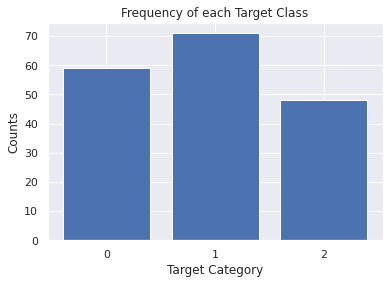

In [ ]:
data = pd.DataFrame(data=wine.data,columns=wine.feature_names)
data['target'] = wine['target']

#Getting average alcohol per target class
print('Mean Alcohol per Target Class:')
print(data.groupby('target')['alcohol'].mean())

#Seeing distribution of target class
counts = data['target'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Target Category')
plt.ylabel('Counts')
plt.title('Frequency of each Target Class')
plt.xticks(counts.index)
plt.show;

It is intersting to see that there is not much of a difference between the averages of the alcohol attribute per target class. This could mean that there is no solid correlation between the two.

It is also interesting ot see the distribution of target class. It seems like class_0 and class_1 make up most of the data with class_1 being the most frequent.

In [ ]:
from sklearn.model_selection import train_test_split

data = data[data['target'] != 2]
X = data.drop('target', axis=1)
Y = data.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.35, random_state=1234)

In [ ]:
from sklearn.linear_model import Perceptron

percept = Perceptron(random_state=1234)
percept.fit(x_train,y_train)

print(f'Accuracy: {percept.score(x_test,y_test):.3f}')

Accuracy: 0.674


In [ ]:
from sklearn.metrics import classification_report

y_pred = percept.predict(x_test)
percept_report = classification_report(y_test,y_pred,output_dict=True) # for combining metrics later
print('Classification Report:\n', classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46



The first thing we notice is that there are more occurences of class_1 than class_0, this could potentially bias how we evaluate the success of our model.

The next thing to note is how the precision score for class_0 is a perfect 1. This means that everytime the model predicted class_0, it was correct. However there is a low recall score for class_0 meaning it didn't catch everything.

For class_1, the recall has a perfect value of 1. This means that the model correctly predicted all the class_1 values, however the lower precision score means that not every prediction was corect.

Confusion Matrix:
 [[ 4 15]
 [ 0 27]]


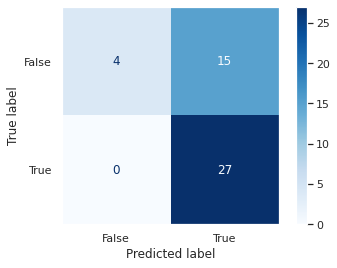

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = percept.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print('Confusion Matrix:\n',cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True]).plot(cmap="Blues")
plt.grid(False)
plt.show()

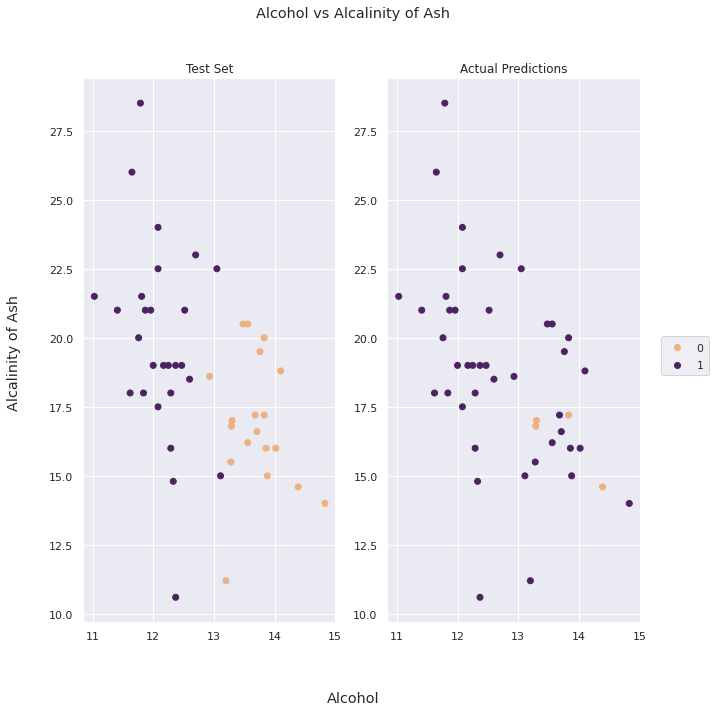

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,10))

# Plot 1
plot1 = axs[0].scatter(x_test['alcohol'],x_test['alcalinity_of_ash'],c=y_test,cmap='flare')
axs[0].set_title("Test Set")

# Plot 2
plot2 = axs[1].scatter(x_test['alcohol'],x_test['alcalinity_of_ash'],c=y_pred,cmap='flare')
axs[1].set_title("Actual Predictions")

# Settings
fig.supxlabel("Alcohol")
fig.supylabel("Alcalinity of Ash")
fig.suptitle("Alcohol vs Alcalinity of Ash")
fig.legend(*plot1.legend_elements(), loc=5)
plt.show()

In [ ]:
wine = datasets.load_wine()
data = pd.DataFrame(data=wine.data,columns=wine.feature_names)
data['target'] = wine['target']

X = data.drop('target', axis=1)
Y = data.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.35, random_state=1234)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1234).fit(x_train, y_train)
print(f'Accuracy: {tree.score(x_test,y_test):.3f}')

Accuracy: 0.937


In [ ]:
y_pred = tree.predict(x_test)
tree_report = classification_report(y_test,y_pred,output_dict=True) # for combining metrics later
print('Classification Report:\n', classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.92      0.92      0.92        26
           2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



The first thing to notice is that the supports for all classes are not too far apart. This is important since a large different in supports can skew the accuracy metrics.

The next thing to note is how the precision score for class_0 is a perfect 1. This means that everytime the model predicted class_0, it was correct. However there is a lower recall score for class_0 meaning it didn't catch everything.

class_2 has a perfect recall score. This means that the model correctly predicted all the class_2 values, however the lower precision score means that not every prediction was corect.

It seems that all the classes have a relatively high f1-score meaning that the model does a decent job of predicting them.

Confusion Matrix:
 [[17  2  0]
 [ 0 24  2]
 [ 0  0 18]]


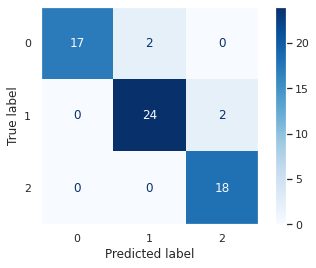

In [ ]:
y_pred = tree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

# Displaying the matrix
print('Confusion Matrix:\n',cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.grid(False)
plt.show()

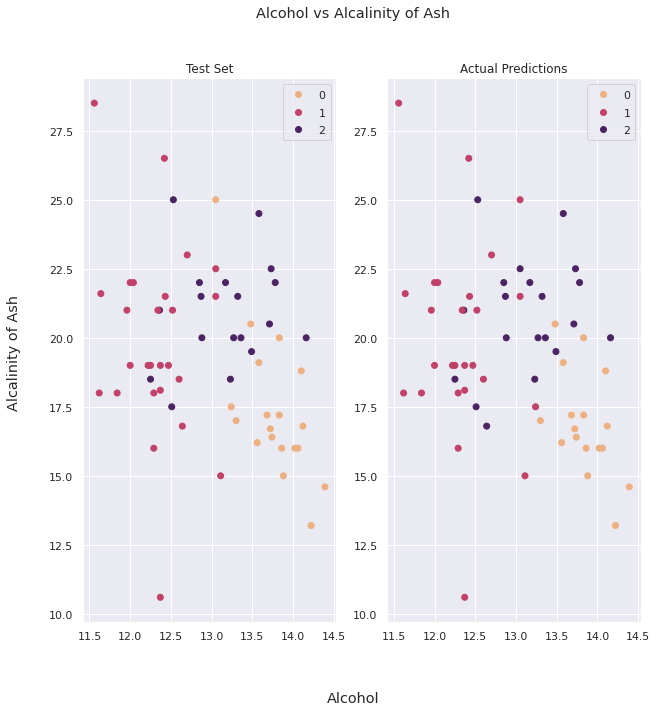

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,10))

# Plot 1
plot1 = axs[0].scatter(x_test['alcohol'],x_test['alcalinity_of_ash'],c=y_test,cmap='flare')
axs[0].legend(*plot1.legend_elements(), loc=1)
axs[0].set_title("Test Set")

# Plot 3
plot2 = axs[1].scatter(x_test['alcohol'],x_test['alcalinity_of_ash'],c=y_pred,cmap='flare')
axs[1].legend(*plot2.legend_elements(), loc=1)
axs[1].set_title("Actual Predictions")

# Settings
fig.supxlabel("Alcohol")
fig.supylabel("Alcalinity of Ash")
fig.suptitle("Alcohol vs Alcalinity of Ash")
plt.show()

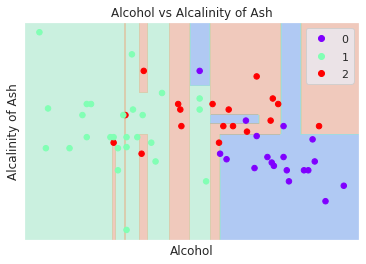

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    plot = ax.scatter(X['alcohol'],X['alcalinity_of_ash'], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.grid(False)
    ax.set_xlabel('Alcohol')
    ax.set_xticks([])
    ax.set_ylabel('Alcalinity of Ash')
    ax.set_yticks([])
    ax.set_title("Alcohol vs Alcalinity of Ash")
    ax.legend(*plot.legend_elements())
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X.values, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(),x_test[['alcohol','alcalinity_of_ash']],y_test)

In [ ]:
wine = datasets.load_wine()
data = pd.DataFrame(data=wine.data,columns=wine.feature_names)
data['target'] = wine['target']

X = data.drop('target', axis=1)
Y = data.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.35, random_state=1234)

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=1234)
LogReg.fit(x_test,y_test)
print(f'Accuracy Score: {LogReg.score(x_test,y_test):.3f}')

Accuracy Score: 0.984


In [ ]:
y_pred = LogReg.predict(x_test)
logreg_report = classification_report(y_test,y_pred,output_dict=True) # for comparing metrics later
print('Classification Report:\n', classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        18

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



class_2 seems to be perfectly predicted as it has a score of 1.0 for precision, recall and f1-score. This means every class_2 is predicted correctly and everytime there is a prediction for class_2 it is correct; in other words, no false positive or false negatives.

The next thing to note is how the precision score for class_0 is a perfect 1. This means that everytime the model predicted class_0, it was correct. However there is a lower recall score for class_0 meaning it didn't catch everything.

Another thing to note is that class_1 has a perfect recall score. This means that the model correctly predicted all the class_1 values, however the lower precision score means that not every prediction was corect.

Confusion Matrix:
 [[18  1  0]
 [ 0 26  0]
 [ 0  0 18]]


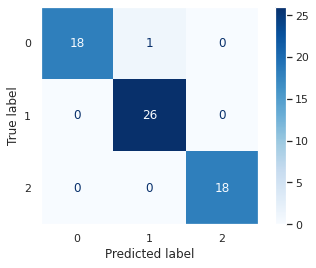

In [ ]:
y_pred = LogReg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

# Displaying the matrix
print('Confusion Matrix:\n',cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.grid(False)
plt.show()

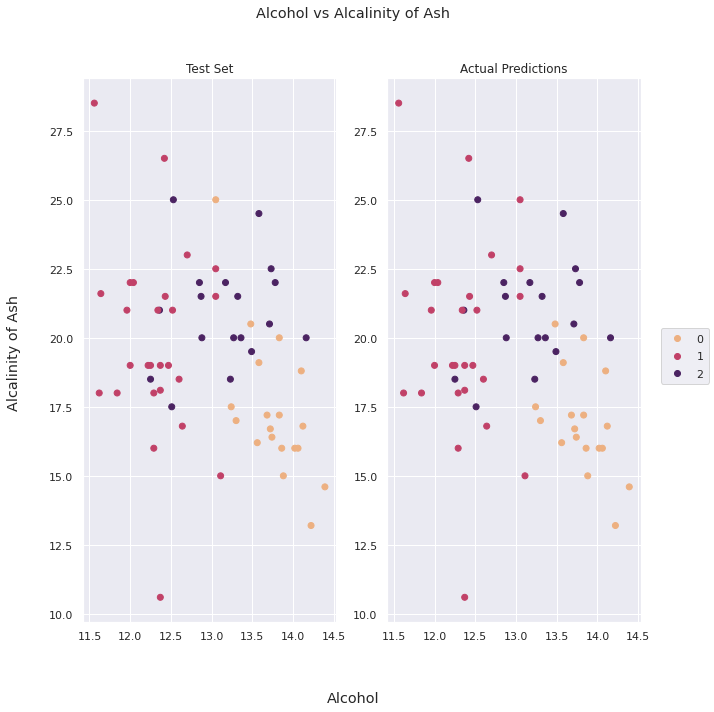

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,10))

# Left Plot
plot1 = axs[0].scatter(x_test['alcohol'],x_test['alcalinity_of_ash'],c=y_test,cmap='flare')
axs[0].set_title("Test Set")

# Right Plot
plot2 = axs[1].scatter(x_test['alcohol'],x_test['alcalinity_of_ash'],c=y_pred,cmap='flare')
axs[1].set_title("Actual Predictions")

# Settings
fig.supxlabel("Alcohol")
fig.supylabel("Alcalinity of Ash")
fig.suptitle("Alcohol vs Alcalinity of Ash")
fig.legend(*plot2.legend_elements(), loc=5)
plt.show()

In [ ]:
model_comparison = pd.DataFrame(columns=['Model Type','Precision','Recall','Accuracy'])

# Enterting data using the previously saved classification reports
model_comparison['Model Type'] = ['Perceptron','Decision Tree Classifier','Logistic Regression']
model_comparison['Precision'] = [percept_report['weighted avg']['precision'],tree_report['weighted avg']['precision'],logreg_report['weighted avg']['precision']]
model_comparison['Recall'] = [percept_report['weighted avg']['recall'],tree_report['weighted avg']['recall'],logreg_report['weighted avg']['recall']]
model_comparison['Accuracy'] = [percept_report['accuracy'],tree_report['accuracy'],logreg_report['accuracy']]

# Formatting Number values
model_comparison['Precision'] = model_comparison['Precision'].map('{:,.3f}'.format)
model_comparison['Recall'] = model_comparison['Recall'].map('{:,.3f}'.format)
model_comparison['Accuracy'] = model_comparison['Accuracy'].map('{:,.3f}'.format)

model_comparison

,Model Type,Precision,Recall,Accuracy
0,Perceptron,0.790,0.674,0.674
1,Decision Tree Classifier,0.940,0.937,0.937
2,Logistic Regression,0.985,0.984,0.984


<ipython-input-21-4fb2db552b4d>:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = ax or plt.gca(projection='3d')


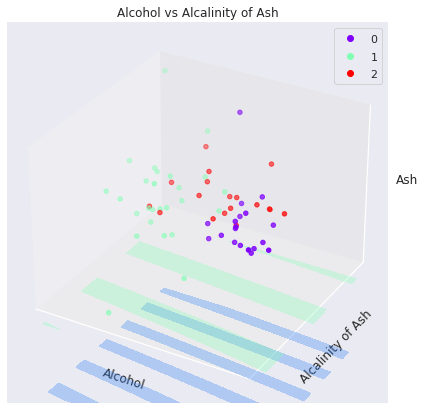

In [ ]:
wine = datasets.load_wine()
data = pd.DataFrame(data=wine.data,columns=wine.feature_names)
data['target'] = wine['target']

X = data.drop('target', axis=1)
Y = data.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.35, random_state=1234)

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca(projection='3d')

    # Plot the training points
    plot = ax.scatter(X['alcohol'],X['alcalinity_of_ash'],X['ash'], c=y, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.set_xlabel('Alcohol')
    ax.set_xticks([])
    ax.set_ylabel('Alcalinity of Ash')
    ax.set_yticks([])
    ax.set_zlabel('Ash')
    ax.set_zticks([])
    ax.set_title("Alcohol vs Alcalinity of Ash")
    ax.legend(*plot.legend_elements())

    model.fit(X.values, y)
    xlim = ax.get_xlim3d()
    ylim = ax.get_ylim3d()
    zlim = ax.get_zlim3d()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=50),
                         np.linspace(*ylim, num=50))

    zz = np.sin(np.sqrt(xx**2 + yy**2))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, zz, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim, zlim=zlim)

fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection': '3d'})
visualize_classifier(DecisionTreeClassifier(),x_test[['alcohol','alcalinity_of_ash','ash']],y_test)